In [1]:
from hnn_core import law_2021_model, calcium_model, MPIBackend, simulate_dipole
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import rescale_pyr_morph, rescale_pyr_mech
sns.set()

In [2]:
law_human = law_2021_model()
law_monkey = law_human.copy()
law_mouse = law_human.copy()

calcium_human = calcium_model()
calcium_monkey = calcium_human.copy()
calcium_mouse = calcium_human.copy()

def scale_apical(net, scaling_factor):
    props = ['L', 'cm']
    mech_edits = [('hh2', 'gkbar_hh2'), ('hh2', 'gnabar_hh2'), ('ca', 'gbar_ca'), ('cad', 'taur_cad'),
                   ('kca', 'gbar_kca'), ('km', 'gbar_km'), ('cat', 'gbar_cat'), ('ar', 'gbar_ar')]
    pyr_cells = ['L2_pyramidal', 'L5_pyramidal']
    #omit_compartments = ['basal_1',  'basal_2',  'basal_3',  'soma']
    omit_compartments = ['basal_1',  'basal_2',  'basal_3']
    for prop in props:        
        if prop == 'cm':
            new_fctr = 1/scaling_factor
        else:
            new_fctr = scaling_factor
        rescale_pyr_morph(net=net, cell_types=pyr_cells, compartment_prop=prop, scaling_factor=new_fctr,
                          omit_compartment=omit_compartments)

    rescale_pyr_mech(net=net, cell_types=pyr_cells, compartment_mech=mech_edits, scaling_factor=scaling_factor,
                        omit_compartment=omit_compartments)

scale_apical(law_monkey, scaling_factor=0.8)
scale_apical(calcium_monkey, scaling_factor=0.8)
scale_apical(law_mouse, scaling_factor=0.28)
scale_apical(calcium_mouse, scaling_factor=0.28)


In [3]:
models = {'law_human': law_human, 'law_monkey': law_monkey, 'law_mouse': law_mouse,
          'calcium_human': calcium_human, 'calcium_monkey': calcium_monkey, 'calcium_mouse': calcium_mouse}

In [4]:
for net_name, net in models.items():
    net.clear_connectivity()
    net.add_tonic_bias(cell_type='L5_pyramidal', amplitude=0.5, t0=50.0, tstop=200.0)
    with MPIBackend(n_procs=8):
        _ = simulate_dipole(net, tstop = 300, record_vsoma=True)



MPI will run over 8 processes
Running 1 trials...


/home/ntolley/Jones_Lab/hnn-core/hnn_core/dipole.py:59: UserWarning: No connections instantiated in network. Consider using net = jones_2009_model() or net = law_2021_model() to create a predefined network from published models.
  warnings.warn('No connections instantiated in network. Consider using '


numprocs=8
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON model
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
[Done]
running trial 1 on 8 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
S

/home/ntolley/Jones_Lab/hnn-core/hnn_core/dipole.py:59: UserWarning: No connections instantiated in network. Consider using net = jones_2009_model() or net = law_2021_model() to create a predefined network from published models.
  warnings.warn('No connections instantiated in network. Consider using '


numprocs=8
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON model
[Done]
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
running trial 1 on 8 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
S

/home/ntolley/Jones_Lab/hnn-core/hnn_core/dipole.py:59: UserWarning: No connections instantiated in network. Consider using net = jones_2009_model() or net = law_2021_model() to create a predefined network from published models.
  warnings.warn('No connections instantiated in network. Consider using '


numprocs=8
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON model
[Done]
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
running trial 1 on 8 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
S

/home/ntolley/Jones_Lab/hnn-core/hnn_core/dipole.py:59: UserWarning: No connections instantiated in network. Consider using net = jones_2009_model() or net = law_2021_model() to create a predefined network from published models.
  warnings.warn('No connections instantiated in network. Consider using '


numprocs=8
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON model
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
[Done]
running trial 1 on 8 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
S

/home/ntolley/Jones_Lab/hnn-core/hnn_core/dipole.py:59: UserWarning: No connections instantiated in network. Consider using net = jones_2009_model() or net = law_2021_model() to create a predefined network from published models.
  warnings.warn('No connections instantiated in network. Consider using '


numprocs=8
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON model
[Done]
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
running trial 1 on 8 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
S

/home/ntolley/Jones_Lab/hnn-core/hnn_core/dipole.py:59: UserWarning: No connections instantiated in network. Consider using net = jones_2009_model() or net = law_2021_model() to create a predefined network from published models.
  warnings.warn('No connections instantiated in network. Consider using '


numprocs=8
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON model
[Done]
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ntolley/Jones_Lab/hnn-core/hnn_core/mod/x86_64/.libs/libnrnmech.so
running trial 1 on 8 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
S

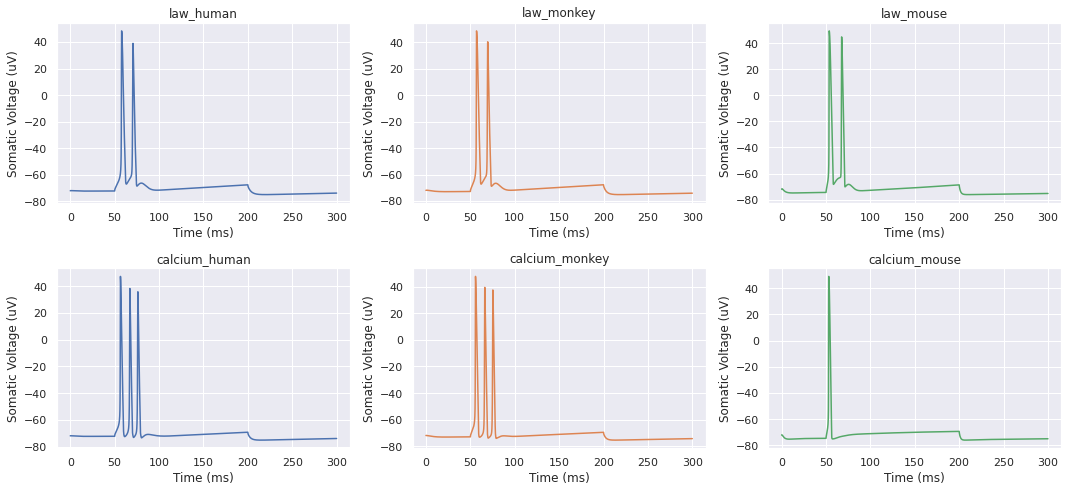

In [5]:
gid = net.gid_ranges['L5_pyramidal'][18]
colors = ['C0', 'C1', 'C2', 'C0', 'C1', 'C2']

plt.figure(figsize=(15, 7))
for idx, (net_name, net) in enumerate(models.items()):
    voltage = net.cell_response.vsoma[0][gid]

    plt.subplot(2, 3, idx+1)
    plt.plot(net.cell_response.times, voltage, color=colors[idx])
    plt.ylabel('Somatic Voltage (uV)')
    plt.xlabel('Time (ms)')
    plt.title(net_name)
plt.tight_layout()
